# Processamento

Assume-se Python 3 no sistema Unix, e a preparação é simples

```bash
sudo pip3 install matplotlib scikit-learn
```

## Scipy

O [Scipy](http://www.scipy.org/) fornece ferramentas eficientes para processamento dos dados (usando o [numpy](https://numpy.org/)) nas aplicações científicas mais comuns.

In [1]:
import numpy as np
from scipy import optimize

np.random.seed(42)

def sine(x, amp, freq):
    return amp * np.sin(freq * x)

num_points = 50
amplitude, frequency = 2.9, 1.5
x = np.linspace(-5, 5, num=num_points)
y = sine(x, amplitude, frequency)
noisy_y = y + np.random.normal(size=x.size)

# Ajuste os parâmetros da função
params, covariance = optimize.curve_fit(sine, x, noisy_y)
fitted_y = sine(x, *params)

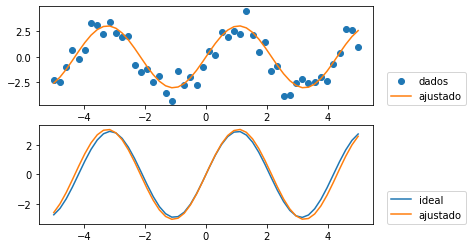

In [2]:
# Visualmente
%matplotlib inline

from matplotlib import pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(x, noisy_y, marker='o', linestyle='', label='dados')
plt.plot(x, fitted_y, label='ajustado')
plt.legend(loc=(1.04,0))

plt.subplot(2, 1, 2)
plt.plot(x, y, label='ideal')
plt.plot(x, fitted_y, label='ajustado')
plt.legend(loc=(1.04,0))

## scikit-learn

O [scikit-learn](https://scikit-learn.org/stable/) é uma das bibliotecas mais utilizadas para aplicações de aprendizagem de máquina.

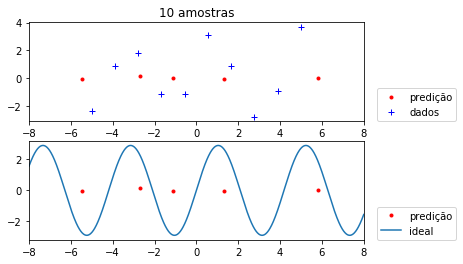

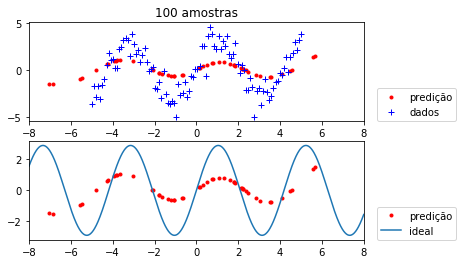

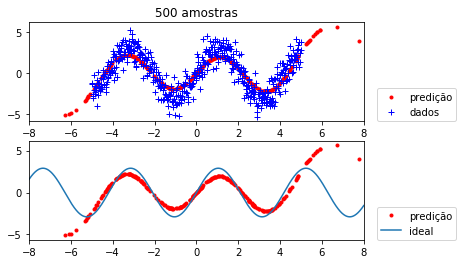

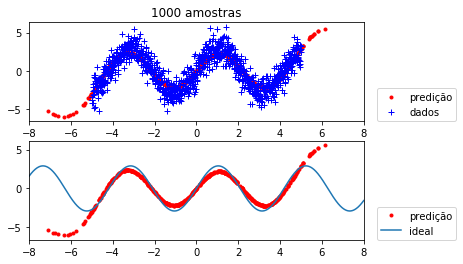

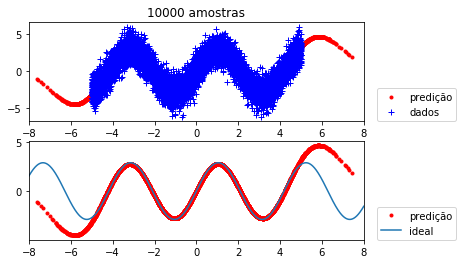

In [3]:
import pandas as pd
from sklearn import svm

def generate_data(num_points):
    train_X = np.linspace(-5, 5, num=num_points)
    train_y = sine(train_X, amplitude, frequency) + np.random.normal(size=num_points)

    num_points = num_points // 2
    test_X = np.linspace(-5, 5, num=num_points) + np.random.normal(size=num_points)
    test_y = sine(test_X, amplitude, frequency) + np.random.normal(size=num_points)
    
    return (pd.DataFrame(train_X), 
            pd.DataFrame(train_y), 
            pd.DataFrame(test_X),
            pd.DataFrame(test_y))
    

def svm_fit_sine(train_X, train_y, test_X):
    clf = svm.SVR()
    clf.fit(train_X, train_y.values.ravel())
    
    return clf.predict(test_X)


ideal_X = np.linspace(-8, 8, num=1000)
ideal_y = sine(ideal_X, amplitude, frequency)
    

for num_points in [10, 100, 500, 1000, 10000]:
    train_X, train_y, test_X, test_y = generate_data(num_points)
    fitted = svm_fit_sine(train_X, train_y, test_X)    

    # plt.plot(test_X, test_y, marker='o', linestyle='', label='ideal')
    plt.subplot(2, 1, 1)
    plt.xlim(-8, 8)
    plt.plot(test_X, fitted, 'r.', label='predição')
    plt.plot(train_X, train_y, 'b+', label='dados')
    plt.title(f'{num_points} amostras')
    plt.legend(loc=(1.04,0))
    
    plt.subplot(2, 1, 2)
    plt.xlim(-8, 8)
    plt.plot(test_X, fitted, 'r.', label='predição')
    plt.plot(ideal_X, ideal_y, label='ideal')
    plt.legend(loc=(1.04,0))
    
    plt.show()

## Outros Recursos

* [Machine Learning in Python](https://www.springboard.com/resources/learning-paths/machine-learning-python/)